# Gallery 4: Curtain Plots
Curtain plots allow you to review 3D results along a long section or cross section. 

This notebook is used in combination with the [TUFLOW FV Python Toolbox](https://tfv.readthedocs.io/en/latest/index.html) (tfv) package. 
To follow along on your own computer, please download the demonstration notebooks from the [TUFLOW Downloads Page](https://www.tuflow.com/downloads/#utilities). Look for the TUFLOW FV Python Toolbox download.
Installation instructions are provided on our [TUFLOW FV Python Toolbox Wiki Page](https://fvwiki.tuflow.com/TUFLOW_FV_Python_Toolbox).

In [1]:
import xarray as xr  # We utilise xarray to do all the heavy lifting 
import tfv.xarray
from pathlib import Path # We'll also make use of the `pathlib` module to assist with managing file-paths, although this is entirely optional! 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Open TUFLOW FV Model Result

In [7]:
model_folder = Path(r'..\..\data')
model_file = 'HYD_002.nc'

fv = xr.open_dataset(model_folder / model_file, decode_times=False).tfv
#fv  # Uncomment if you would like to review the Dataset

#### Single Curtain Plot

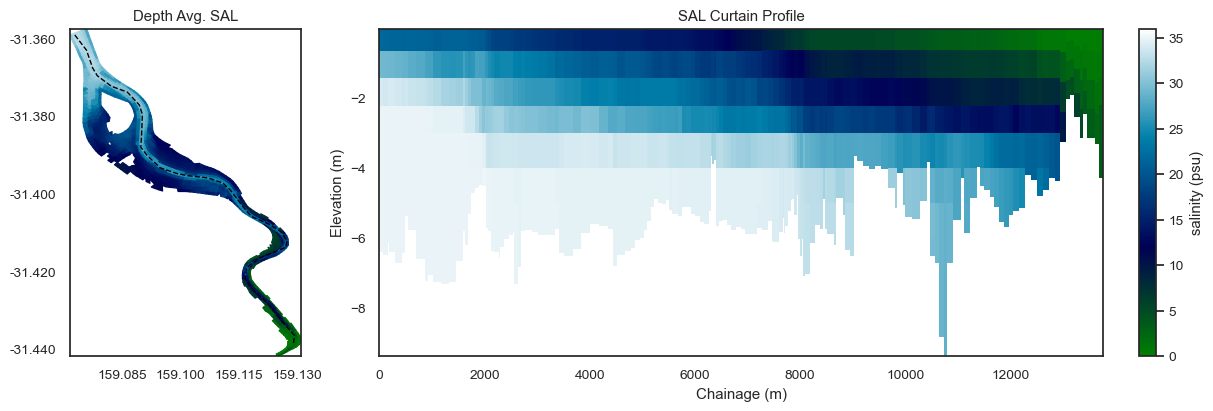

In [3]:
from matplotlib.gridspec import GridSpec
sns.set(style='white', font_scale=0.9)

polyline = np.loadtxt(model_folder / 'polyline.csv', skiprows=1, delimiter=',')

time = '2011-05-02 12:00'
vardict = {
    'TEMP': dict(cmap='inferno', clim=(10, 22)),
    'SAL': dict(cmap='ocean', clim=(0, 36)),
    'V': dict(cmap='jet', clim=(0, 1)),
}

var = 'SAL'

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 3]}, constrained_layout=True)

cspec = vardict[var]
fv.plot(var, time, ax=ax1, colorbar=False, **cspec)
ax1.plot(polyline[:, 0], polyline[:, 1], lw=1, color='black', ls='--')
ax1.set_aspect('equal')
ax1.set_title(f'Depth Avg. {var}')

fv.plot_curtain(polyline, var, time, ax=ax2, ec='none', **cspec)
ax2.set_title(f'{var} Curtain Profile')

plt.show()

#### Multiple Curtain Plots

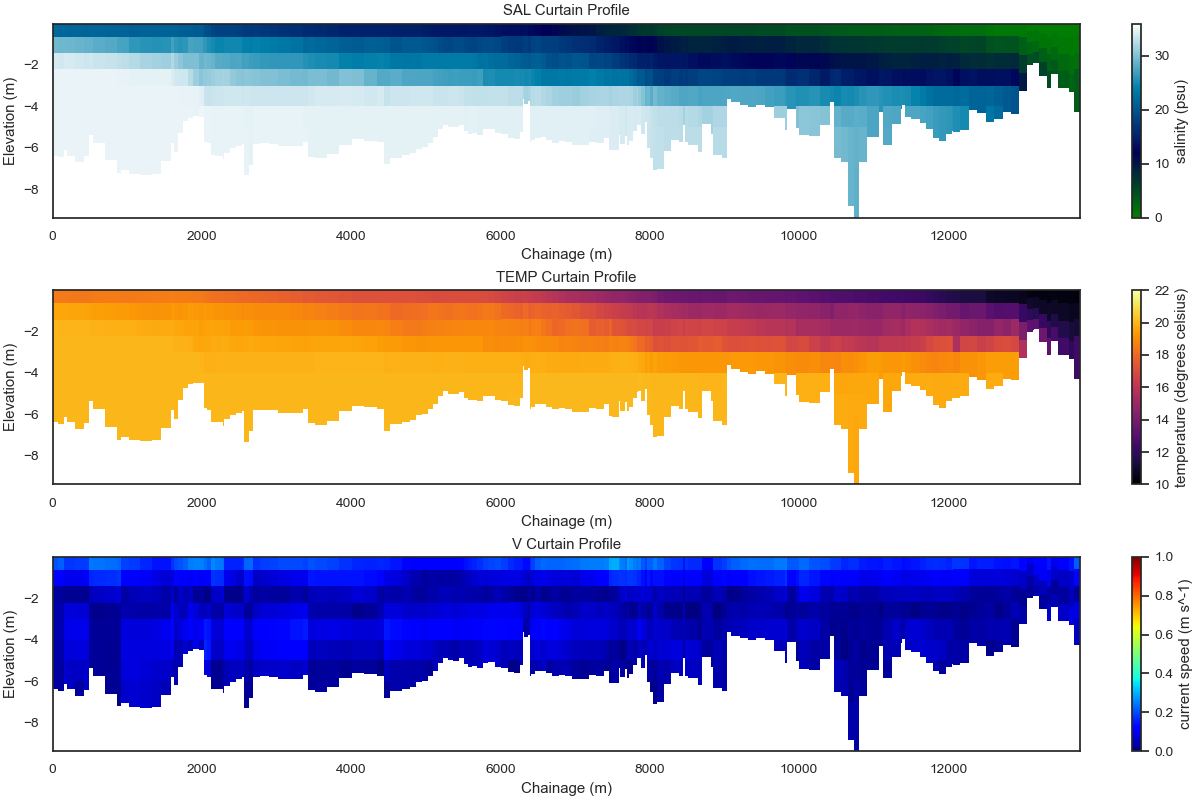

In [6]:
# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), constrained_layout=True)


var = 'SAL'
cspec = vardict[var]
fv.plot_curtain(polyline, var, time, ax=ax1, ec='none', **cspec)
ax1.set_title(f'{var} Curtain Profile')

var = 'TEMP'
cspec = vardict[var]
fv.plot_curtain(polyline, var, time, ax=ax2, ec='none', **cspec)
ax2.set_title(f'{var} Curtain Profile')

var = 'V'
cspec = vardict[var]
fv.plot_curtain(polyline, var, time, ax=ax3, ec='none', **cspec)
ax3.set_title(f'{var} Curtain Profile')

plt.show()

#### Plot Interactive Curtain

GridspecLayout(children=(HBox(children=(Play(value=0, description='Play', interval=500, layout=Layout(height='…

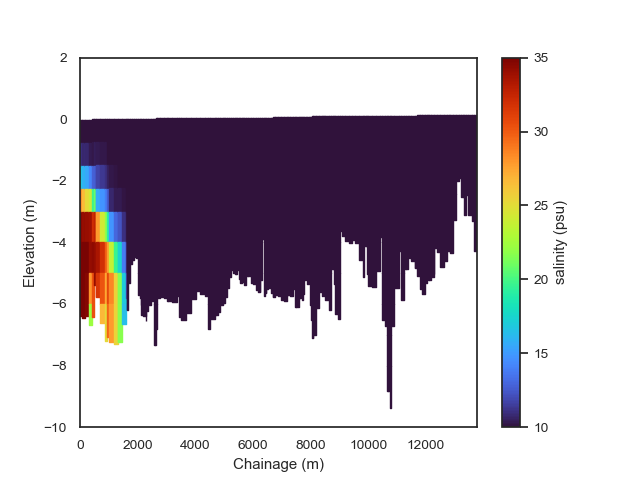

In [5]:
%matplotlib widget

fv.plot_curtain_interactive(polyline, 'SAL', cmap='turbo', clim=(10,35), edgecolor='face')
plt.ylim(-10, 2)
plt.show()


This concludes the examples on curtain plotting.